# Week 2

## Brussels: Where to implement a restaurant dedicated for young people from 20 to 40 years old?


### Introduction

My project is to find the best place in Brussels to implement a restaurant for young people from 20 to 40 years old. As the capital city of Europe, Brussels is a dynamic city with multicultural people from all over the people. It already exists plenty of places that offer good food, good vibe and nice environment. But as all the big cities, everything is spread all over the 19 municipalities composing Brussels and it can be quite challenging to know in which neighborhood it would be the best to go out. Belgian people are keen on going out for sharing a good dinner and they always look forward to discover new places and new food. So implementing a restaurant would always be a succes. But depending which kind of customers you want to reach, it seems essential to have an overal view of the population. I decided to focus on younger people from 20 to 40 years old. The aim of the project is to identify in which municipalities stay the targeted population and which kind of restaurant already exist in these municipalities to open a new business.

### Data

For my project, I will need data about Brussels population sorted by age and municipality, and an overview about existing restaurants.

For the population, I used a link from Brussels website: http://ibsa.brussels/themes/population#.XlqYFUqQhPY that contains Brussels population sorted by age and municipality. I chose to focus on people from 20 to 40 years old. The data is contained in a Excel sheet where we can find the population sorted by age and by municipality.





For the restaurants, I used Foursquare to get an overview of the existing restaurants located in Brussels.

### Methodology

The first step will consist in exploring the 19 municipalities of Brussels and pointing the 5 municipalities where you find the most people aged from 20 to 40 years old as described in the introduction

Thanks to the Excel sheet provided by Brussels website, we have the data needed. I used Pandas to import the Excel file and then I cleaned the frame to keep the targeted population sorted by municipalities. Geopy will then give me the location of the 19 municipalities which will be useful to put the data on a map. Folium is used to create a map where we will find a marker for each municipality. The shape of the marker is directly linked with the population established in every municipality

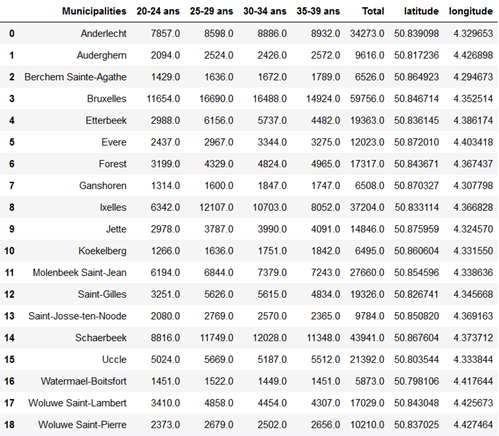

The second step will consist in exploring the restaurants already existing in Brussels.

Foursquare will be used to extract the data and give us an overview of the different venues that can be find in Brussels. The venues will be sorted by municipality. After a research via Foursquare API, I could identify the most common venues with a limit of 100 venues by municipality and sort them by area. <br/>I kept the 5 most common venues and decided to use an unsupervised machine learning method to cluster them in 5 groups. I used the k-means clustering to get 5 distincts groups. "Sklearn.cluster" allowed me to get 5 clusters based on the most common venues.<br/>
I then used Folium to create a map that shows the 5 differents clusters.




### Results

Concerning the population, the data allowed us to extract the 5 municipalities with the most important population aged between 20 and 40 years old. An amount of 379.142 persons between 20 and 40 years live in the 19 municipalities. The top 5 municipalities are: Brussels(15,8%), Schaerbeek(11,6%), Ixelles(9,8%), Anderlecht (9%) and Molenbeek(7,3%). So let's focus on these 5 municipalties to figure out which type of restaurants already exist in that area. <Br/> The map bellow shows where are situated these municipalities.The size of the markers are directly correlated with the size of the population from 20 to 40 years old.

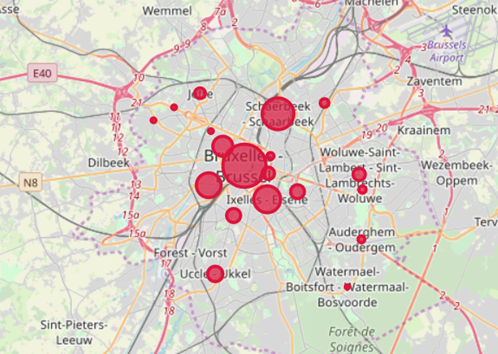

The research via Foursquare API and the clustering method show us 5 distincts groups.
<br/>The first cluster includes only one municipality: Woluwe-Saint-Lambert.<br/>
The second cluster includes 2 municipalities: Anderlecht and Forest and is caracterised by sandwich places. Anderlecht is part of our targeted population.<br/> 


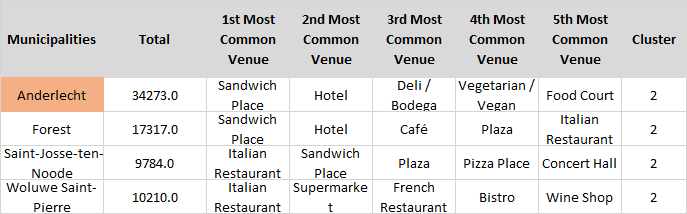

The third cluster includes 12 of the 19 municipalities and 4 of the targeted ones: Bruxelles, Ixelles, Molenbeek and Schaerbeek. However this third cluster is mainly caracterized by italian/pizza places and bar, Bruxelles's most common venues are definitely mre linked to belgian culture as it is chocolate shop, beer bar and belgian restaurant. Ixelles seem more multicultural with italian and african restaurants. Molenbeek regroups snacks and bar and finally Schaerbeek which most common venues are tram station, bakery and plaza.


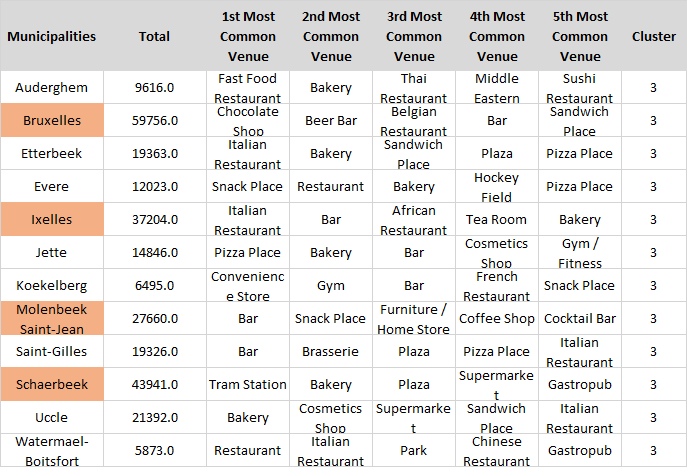

The fourth cluster includes only one municipality which is not part of our targeted group.<Br/>The map below shows the 5 clusters represented by 5 differents colours. In light blue, the cluster in which belongs 4 of the 5 chosen municipalities.

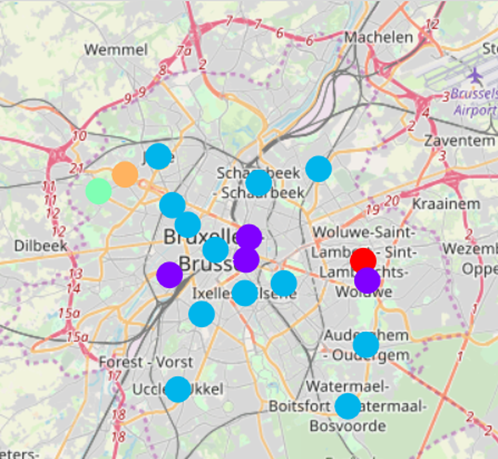

### Discussion

Following the results, it appears that different options would be possible for this business depending which strategy we are going to follow.<Br/> Let's exclude Anderlecht which is part of the second cluster caracterized by sandwich place as this is not this kind of venue we want to focus on.
Bruxelles has a high rate of persons between 20 and 40 years old but has also plenty of tourists as is the center of the city where you can find all the main touristical attractions. So Brussels might not be the best location for a restaurant dedicated for locals young people.<Br/> Ixelles seems to be already the place where young people are going out with multicultural restaurants and bar. That would be a good location to implement a new restaurant if thinking only by what exists already around. But maybe that we could take the optin of a less busy municipality but still close to the famous ones. Molenbeek and Schaerbeek don't offer plenty of restaurants but are however part of the top 5 municipalities with the higher rate of young people. To impement a restaurant overthere might extend the well-known area of Ixelles and offer new intrestings locations for local people.

### Conclusion

In conclusion, we decided to extract the 5 municipalities of Brussels-capital which have the highest rate of young people from 20 to 40 years old to find which of them is the best to implement a restaurant. We excluded Anderlecht as it's the only municipality which is not part of the third cluster so it might not be geographically optimum. Bruxelles would be a good option for a touristic restaurant but not for a local one. Ixelles has already a big offer so the risk is that a new restaurant would get lost as just another one. So finally still remain Molenbeek and Schaerbeek which seem the best options to implement a new restaurant as they have a high rate of young people and still not that busy with plenty of different offers.<Br/>But this study has his limits as we considered only the age of the population. There are plenty of differents aspects we should analyse and consider before implementing a new restaurant as the socio-economical level of the differents areas, the cultural aspect, the will of the population,...

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize

In [2]:
import html5lib
import lxml
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError


from pandas.io.html import read_html



import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [3]:
from pandas import ExcelWriter 
from pandas import ExcelFile 
import glob
import os

In [4]:
Bxl=pd.read_excel(r'http://ibsa.brussels/fichiers/chiffres/1.2_population_structure_par_age.xls', sheet_name= '1.2.1.1', index_col=None, header=1, dtype={'Name': str, 'Value': float})
Bxl.head()

,Unnamed: 0,0-4 ans,5-9 ans,10-14 ans,15-19 ans,20-24 ans,25-29 ans,30-34 ans,35-39 ans,40-44 ans,...,55-59 ans,60-64 ans,65-69 ans,70-74 ans,75-79 ans,80-84 ans,85-89 ans,90-94 ans,95-99 ans,100 ans et +
0,Anderlecht,9494.0,9149.0,8165.0,7368.0,7857.0,8598.0,8886.0,8932.0,8782.0,...,6341.0,5365.0,4128.0,3427.0,2697.0,2343.0,1682.0,732.0,197.0,12.0
1,Auderghem,2033.0,2161.0,1976.0,1804.0,2094.0,2524.0,2426.0,2572.0,2516.0,...,2045.0,1784.0,1504.0,1268.0,915.0,841.0,645.0,328.0,74.0,7.0
2,Berchem Sainte-Agathe,1849.0,1876.0,1669.0,1592.0,1429.0,1636.0,1672.0,1789.0,1685.0,...,1482.0,1311.0,1069.0,894.0,680.0,592.0,425.0,166.0,37.0,2.0
3,Bruxelles,13297.0,12576.0,11115.0,9810.0,11654.0,16690.0,16488.0,14924.0,13720.0,...,9748.0,7864.0,6142.0,4777.0,3461.0,2720.0,1790.0,905.0,263.0,27.0
4,Etterbeek,2995.0,2411.0,2080.0,1990.0,2988.0,6156.0,5737.0,4482.0,3612.0,...,2520.0,2066.0,1591.0,1260.0,899.0,686.0,503.0,266.0,78.0,5.0


In [ ]:
Bxl.drop(Bxl.tail(10).index,inplace=True)   

In [6]:
Bxl.drop([' 0-4 ans', ' 5-9 ans', ' 10-14 ans', ' 15-19 ans',' 40-44 ans',
       ' 45-49 ans', ' 50-54 ans', ' 55-59 ans', ' 60-64 ans',
       ' 65-69 ans', ' 70-74 ans', ' 75-79 ans', ' 80-84 ans',
       '85-89 ans', ' 90-94 ans', '95-99 ans', '100 ans et +'], axis=1, inplace=True)  

In [7]:
Bxl['Total'] =Bxl.sum(axis=1)         
Bxl

,Unnamed: 0,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total
0,Anderlecht,7857.0,8598.0,8886.0,8932.0,34273.0
1,Auderghem,2094.0,2524.0,2426.0,2572.0,9616.0
2,Berchem Sainte-Agathe,1429.0,1636.0,1672.0,1789.0,6526.0
3,Bruxelles,11654.0,16690.0,16488.0,14924.0,59756.0
4,Etterbeek,2988.0,6156.0,5737.0,4482.0,19363.0
5,Evere,2437.0,2967.0,3344.0,3275.0,12023.0
6,Forest,3199.0,4329.0,4824.0,4965.0,17317.0
7,Ganshoren,1314.0,1600.0,1847.0,1747.0,6508.0
8,Ixelles,6342.0,12107.0,10703.0,8052.0,37204.0
9,Jette,2978.0,3787.0,3990.0,4091.0,14846.0


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [ ]:
address = 'Brussels'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude_br = location.latitude
longitude_br = location.longitude
print('The geograpical coordinate of Brussels are {}, {}.'.format(latitude_br, longitude_br))

In [10]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
Bxl['location'] = Bxl['Unnamed: 0'].apply(geocode)

Bxl['point'] = Bxl['location'].apply(lambda loc: tuple(loc.point) if loc else None)
Bxl

,Unnamed: 0,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total,location,point
0,Anderlecht,7857.0,8598.0,8886.0,8932.0,34273.0,"(Anderlecht, Région de Bruxelles-Capitale - Br...","(50.8390983, 4.3296526, 0.0)"
1,Auderghem,2094.0,2524.0,2426.0,2572.0,9616.0,"(Auderghem - Oudergem, Région de Bruxelles-Cap...","(50.8172355, 4.4268982, 0.0)"
2,Berchem Sainte-Agathe,1429.0,1636.0,1672.0,1789.0,6526.0,"(Berchem-Sainte-Agathe - Sint-Agatha-Berchem, ...","(50.8649231, 4.2946734, 0.0)"
3,Bruxelles,11654.0,16690.0,16488.0,14924.0,59756.0,"(Bruxelles / Brussel, Ville de Bruxelles - Sta...","(50.8436709, 4.3674366933879565, 0.0)"
4,Etterbeek,2988.0,6156.0,5737.0,4482.0,19363.0,"(Etterbeek, Région de Bruxelles-Capitale - Bru...","(50.8361447, 4.3861737, 0.0)"
5,Evere,2437.0,2967.0,3344.0,3275.0,12023.0,"(Evere, Région de Bruxelles-Capitale - Brussel...","(50.8720096, 4.4034182, 0.0)"
6,Forest,3199.0,4329.0,4824.0,4965.0,17317.0,"(Forest County, Pennsylvania, United States of...","(41.5329762, -79.2640912, 0.0)"
7,Ganshoren,1314.0,1600.0,1847.0,1747.0,6508.0,"(Ganshoren, Région de Bruxelles-Capitale - Bru...","(50.8703273, 4.307798, 0.0)"
8,Ixelles,6342.0,12107.0,10703.0,8052.0,37204.0,"(Ixelles - Elsene, Région de Bruxelles-Capital...","(50.8331141, 4.3668279, 0.0)"
9,Jette,2978.0,3787.0,3990.0,4091.0,14846.0,"(Jette, Région de Bruxelles-Capitale - Brussel...","(50.8759585, 4.3245702, 0.0)"


In [11]:
coord = pd.DataFrame({'latitude': [50.8390983, 50.8172355, 50.8649231, 50.84671435, 50.8361447, 50.8720096, 50.8436709, 50.8703273, 50.8331141, 50.8759585, 50.8606042, 50.8545959, 50.8267409, 50.8508197, 50.8676041, 50.8035441, 50.7981063, 50.843048, 50.8370253], 'longitude': [4.3296526, 4.4268982, 4.2946734, 4.35251412, 4.3861737, 4.4034182,4.36743669, 4.307798, 4.3668279, 4.3245702, 4.3315503, 4.338636, 4.345668, 4.3691634, 4.3737121, 4.3338445, 4.4176441, 4.4256732, 4.4274636]})
coord.dtypes

latitude     float64
longitude    float64
dtype: object

In [12]:
Bxl.rename(columns={'Unnamed: 0': 'Municipalities'}, inplace=True)
Bxl.drop(['location', 'point'], axis=1, inplace=True) 
Bxl1 = pd.concat([Bxl, coord], axis=1, sort=False)
Bxl1

,Municipalities,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total,latitude,longitude
0,Anderlecht,7857.0,8598.0,8886.0,8932.0,34273.0,50.839098,4.329653
1,Auderghem,2094.0,2524.0,2426.0,2572.0,9616.0,50.817236,4.426898
2,Berchem Sainte-Agathe,1429.0,1636.0,1672.0,1789.0,6526.0,50.864923,4.294673
3,Bruxelles,11654.0,16690.0,16488.0,14924.0,59756.0,50.846714,4.352514
4,Etterbeek,2988.0,6156.0,5737.0,4482.0,19363.0,50.836145,4.386174
5,Evere,2437.0,2967.0,3344.0,3275.0,12023.0,50.872010,4.403418
6,Forest,3199.0,4329.0,4824.0,4965.0,17317.0,50.843671,4.367437
7,Ganshoren,1314.0,1600.0,1847.0,1747.0,6508.0,50.870327,4.307798
8,Ixelles,6342.0,12107.0,10703.0,8052.0,37204.0,50.833114,4.366828
9,Jette,2978.0,3787.0,3990.0,4091.0,14846.0,50.875959,4.324570


In [13]:
map_brussels = folium.Map(location=[latitude_br, longitude_br], zoom_start=12)

for i in range(0,len(Bxl1)):
   folium.CircleMarker(
      location=[Bxl1.iloc[i]['latitude'], Bxl1.iloc[i]['longitude']],
      popup=Bxl1.iloc[i]['Municipalities'],
      radius=Bxl1.iloc[i]['Total']/3000,
      color='crimson',
      fill=True,
      fill_opacity=0.7,
      fill_color='crimson').add_to(map_brussels)

map_brussels

In [14]:
CLIENT_ID = '34D40L2F3ZCLRHBGW4W0CJJB555A1QNBETAWTUJ434VQEGQA' # your Foursquare ID
CLIENT_SECRET = '3UCHWQ1R41NUSWJIAMEZG0WGPIKL5ZHCKW2GJUUQZH0C1FPP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 34D40L2F3ZCLRHBGW4W0CJJB555A1QNBETAWTUJ434VQEGQA
CLIENT_SECRET:3UCHWQ1R41NUSWJIAMEZG0WGPIKL5ZHCKW2GJUUQZH0C1FPP


In [15]:
Brussels_lat=50.848434 
Brussels_lng=4.381943

In [16]:
Municipality_latitude = Bxl1.loc[8, 'latitude'] # neighborhood latitude value
Municipality_longitude = Bxl1.loc[8, 'longitude'] # neighborhood longitude value

Municipality_name = Bxl1.loc[8, 'Municipalities'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Municipality_name, 
                                                               Municipality_latitude, 
                                                              Municipality_longitude))

Latitude and longitude values of Ixelles are 50.8331141, 4.3668279.


In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    Municipality_latitude, 
    Municipality_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=34D40L2F3ZCLRHBGW4W0CJJB555A1QNBETAWTUJ434VQEGQA&client_secret=3UCHWQ1R41NUSWJIAMEZG0WGPIKL5ZHCKW2GJUUQZH0C1FPP&v=20180605&ll=50.8331141,4.3668279&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e73cd830cc1fd001b4c7bba'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Matonge',
  'headerFullLocation': 'Matonge, Brussels',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 51,
  'suggestedBounds': {'ne': {'lat': 50.837614104500005,
    'lng': 4.373939577228771},
   'sw': {'lat': 50.8286140955, 'lng': 4.359716222771229}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4baa7ff6f964a520546f3ae3',
       'name': 'La Crèche des Artistes',
       'location': {'address': 'Kribbestraat 21 Rue de la Crèche',
        'lat': 50.834153308437195,
        'lng': 4.368178329808504,
        'labeledLatLngs': [{'label': 'display',
      

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,La Crèche des Artistes,Italian Restaurant,50.834153,4.368178
1,L'Athénée,Bar,50.835058,4.366394
2,Färm,Organic Grocery,50.834188,4.365456
3,De Haus,Cocktail Bar,50.832602,4.366779
4,Renard Bakery,Bakery,50.833492,4.366214


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
         # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Municipalities', 
                  'Municipalities Latitude', 
                  'Municipalities Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
            
nearby_venues.head()       

,name,categories,lat,lng
0,La Crèche des Artistes,Italian Restaurant,50.834153,4.368178
1,L'Athénée,Bar,50.835058,4.366394
2,Färm,Organic Grocery,50.834188,4.365456
3,De Haus,Cocktail Bar,50.832602,4.366779
4,Renard Bakery,Bakery,50.833492,4.366214


In [24]:
Bxl_venues = getNearbyVenues(names=Bxl1['Municipalities'],
                                   latitudes=Bxl1['latitude'],
                                   longitudes=Bxl1['longitude'])

Anderlecht
Auderghem
Berchem Sainte-Agathe
Bruxelles
Etterbeek
Evere
Forest
Ganshoren
Ixelles
Jette
Koekelberg
Molenbeek Saint-Jean
Saint-Gilles
Saint-Josse-ten-Noode
Schaerbeek
Uccle
Watermael-Boitsfort
Woluwe Saint-Lambert
Woluwe Saint-Pierre


In [25]:
Bxl_venues.groupby('Municipalities').count()

,Municipalities Latitude,Municipalities Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Municipalities,,,,,,
Anderlecht,33,33,33,33,33,33
Auderghem,43,43,43,43,43,43
Berchem Sainte-Agathe,9,9,9,9,9,9
Bruxelles,100,100,100,100,100,100
Etterbeek,78,78,78,78,78,78
Evere,19,19,19,19,19,19
Forest,33,33,33,33,33,33
Ganshoren,19,19,19,19,19,19
Ixelles,51,51,51,51,51,51


In [26]:
# ANALYSE BY MUNICIPALITY

Bxl_onehot = pd.get_dummies(Bxl_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bxl_onehot['Municipalities'] = Bxl_venues['Municipalities'] 

# move neighborhood column to the first column
fixed_columns = [Bxl_onehot.columns[-1]] + list(Bxl_onehot.columns[:-1])
Bxl_onehot = Bxl_onehot[fixed_columns]

Bxl_onehot.head()

,Municipalities,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Winery,Women's Store
0,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Bxl_grouped = Bxl_onehot.groupby('Municipalities').mean().reset_index()

Bxl_grouped

,Municipalities,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Winery,Women's Store
0,Anderlecht,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Auderghem,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Berchem Sainte-Agathe,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bruxelles,0.000000,0.01,0.000000,0.000000,0.000000,0.00,0.000000,0.030000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000
4,Etterbeek,0.000000,0.00,0.000000,0.012821,0.000000,0.00,0.000000,0.012821,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.025641,0.000000,0.000000,0.000000
5,Evere,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Forest,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Ganshoren,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Ixelles,0.039216,0.00,0.000000,0.000000,0.019608,0.00,0.000000,0.000000,0.000000,...,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000
9,Jette,0.000000,0.00,0.000000,0.000000,0.020408,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:


num_top_venues = 5

for hood in Bxl_grouped['Municipalities']:
    print("----"+hood+"----")
    temp = Bxl_grouped[Bxl_grouped['Municipalities'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



----Anderlecht----
            venue  freq
0  Sandwich Place  0.12
1           Hotel  0.09
2   Deli / Bodega  0.09
3  Ice Cream Shop  0.06
4      Food Court  0.06


----Auderghem----
                  venue  freq
0  Fast Food Restaurant  0.07
1     French Restaurant  0.05
2                 Plaza  0.05
3           Pizza Place  0.05
4      Sushi Restaurant  0.05


----Berchem Sainte-Agathe----
               venue  freq
0   Greek Restaurant  0.22
1              Plaza  0.11
2        Snack Place  0.11
3        Supermarket  0.11
4  French Restaurant  0.11


----Bruxelles----
                venue  freq
0      Chocolate Shop  0.09
1            Beer Bar  0.08
2  Belgian Restaurant  0.05
3                 Bar  0.05
4      Sandwich Place  0.04


----Etterbeek----
                venue  freq
0  Italian Restaurant  0.12
1              Bakery  0.05
2         Pizza Place  0.04
3               Plaza  0.04
4    Greek Restaurant  0.04


----Evere----
          venue  freq
0    Restaurant  0.11
1   Sna

In [29]:


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [30]:


num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Municipalities']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Municipality_venues_sorted = pd.DataFrame(columns=columns)
Municipality_venues_sorted['Municipalities'] = Bxl_grouped['Municipalities']

for ind in np.arange(Bxl_grouped.shape[0]):
    Municipality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bxl_grouped.iloc[ind, :], num_top_venues)

Municipality_venues_sorted.head()

,Municipalities,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Anderlecht,Sandwich Place,Hotel,Deli / Bodega,Vegetarian / Vegan Restaurant,Food Court
1,Auderghem,Fast Food Restaurant,Bakery,Thai Restaurant,Middle Eastern Restaurant,Sushi Restaurant
2,Berchem Sainte-Agathe,Greek Restaurant,Restaurant,Snack Place,Gym,Plaza
3,Bruxelles,Chocolate Shop,Beer Bar,Belgian Restaurant,Bar,Sandwich Place
4,Etterbeek,Italian Restaurant,Bakery,Sandwich Place,Plaza,Pizza Place


In [31]:


kclusters = 5
Bxl_grouped_clustering = Bxl_grouped.drop('Municipalities', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bxl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5]

array([1, 2, 3, 2, 2], dtype=int32)

In [32]:
Municipality_venues_sorted['Cluster']=kmeans.labels_
Municipality_venues_sorted

,Municipalities,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
0,Anderlecht,Sandwich Place,Hotel,Deli / Bodega,Vegetarian / Vegan Restaurant,Food Court,1
1,Auderghem,Fast Food Restaurant,Bakery,Thai Restaurant,Middle Eastern Restaurant,Sushi Restaurant,2
2,Berchem Sainte-Agathe,Greek Restaurant,Restaurant,Snack Place,Gym,Plaza,3
3,Bruxelles,Chocolate Shop,Beer Bar,Belgian Restaurant,Bar,Sandwich Place,2
4,Etterbeek,Italian Restaurant,Bakery,Sandwich Place,Plaza,Pizza Place,2
5,Evere,Snack Place,Restaurant,Bakery,Hockey Field,Pizza Place,2
6,Forest,Sandwich Place,Hotel,Café,Plaza,Italian Restaurant,1
7,Ganshoren,Bakery,Pharmacy,Boutique,Snack Place,Burger Joint,4
8,Ixelles,Italian Restaurant,Bar,African Restaurant,Tea Room,Bakery,2
9,Jette,Pizza Place,Bakery,Bar,Cosmetics Shop,Gym / Fitness Center,2


In [33]:
Bxl_merged = Bxl1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Bxl_merged = Bxl_merged.join(Municipality_venues_sorted.set_index('Municipalities'), on='Municipalities')

Bxl_merged.head() 

,Municipalities,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
0,Anderlecht,7857.0,8598.0,8886.0,8932.0,34273.0,50.839098,4.329653,Sandwich Place,Hotel,Deli / Bodega,Vegetarian / Vegan Restaurant,Food Court,1
1,Auderghem,2094.0,2524.0,2426.0,2572.0,9616.0,50.817236,4.426898,Fast Food Restaurant,Bakery,Thai Restaurant,Middle Eastern Restaurant,Sushi Restaurant,2
2,Berchem Sainte-Agathe,1429.0,1636.0,1672.0,1789.0,6526.0,50.864923,4.294673,Greek Restaurant,Restaurant,Snack Place,Gym,Plaza,3
3,Bruxelles,11654.0,16690.0,16488.0,14924.0,59756.0,50.846714,4.352514,Chocolate Shop,Beer Bar,Belgian Restaurant,Bar,Sandwich Place,2
4,Etterbeek,2988.0,6156.0,5737.0,4482.0,19363.0,50.836145,4.386174,Italian Restaurant,Bakery,Sandwich Place,Plaza,Pizza Place,2


In [34]:


map_clusters = folium.Map(location=[latitude_br, longitude_br], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bxl_merged['latitude'], Bxl_merged['longitude'], Bxl_merged['Municipalities'], Bxl_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)


       
map_clusters

In [35]:
Bxl_merged[Bxl_merged['Cluster']==0]

,Municipalities,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
17,Woluwe Saint-Lambert,3410.0,4858.0,4454.0,4307.0,17029.0,50.843048,4.425673,Park,Athletics & Sports,Skating Rink,Supermarket,Italian Restaurant,0


In [36]:
Bxl_merged[Bxl_merged['Cluster']==1]

,Municipalities,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
0,Anderlecht,7857.0,8598.0,8886.0,8932.0,34273.0,50.839098,4.329653,Sandwich Place,Hotel,Deli / Bodega,Vegetarian / Vegan Restaurant,Food Court,1
6,Forest,3199.0,4329.0,4824.0,4965.0,17317.0,50.843671,4.367437,Sandwich Place,Hotel,Café,Plaza,Italian Restaurant,1
13,Saint-Josse-ten-Noode,2080.0,2769.0,2570.0,2365.0,9784.0,50.850820,4.369163,Italian Restaurant,Sandwich Place,Plaza,Pizza Place,Concert Hall,1
18,Woluwe Saint-Pierre,2373.0,2679.0,2502.0,2656.0,10210.0,50.837025,4.427464,Italian Restaurant,Supermarket,French Restaurant,Bistro,Wine Shop,1


In [37]:
Bxl_merged[Bxl_merged['Cluster']==2]

,Municipalities,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
1,Auderghem,2094.0,2524.0,2426.0,2572.0,9616.0,50.817236,4.426898,Fast Food Restaurant,Bakery,Thai Restaurant,Middle Eastern Restaurant,Sushi Restaurant,2
3,Bruxelles,11654.0,16690.0,16488.0,14924.0,59756.0,50.846714,4.352514,Chocolate Shop,Beer Bar,Belgian Restaurant,Bar,Sandwich Place,2
4,Etterbeek,2988.0,6156.0,5737.0,4482.0,19363.0,50.836145,4.386174,Italian Restaurant,Bakery,Sandwich Place,Plaza,Pizza Place,2
5,Evere,2437.0,2967.0,3344.0,3275.0,12023.0,50.872010,4.403418,Snack Place,Restaurant,Bakery,Hockey Field,Pizza Place,2
8,Ixelles,6342.0,12107.0,10703.0,8052.0,37204.0,50.833114,4.366828,Italian Restaurant,Bar,African Restaurant,Tea Room,Bakery,2
9,Jette,2978.0,3787.0,3990.0,4091.0,14846.0,50.875959,4.324570,Pizza Place,Bakery,Bar,Cosmetics Shop,Gym / Fitness Center,2
10,Koekelberg,1266.0,1636.0,1751.0,1842.0,6495.0,50.860604,4.331550,Convenience Store,Gym,Bar,French Restaurant,Snack Place,2
11,Molenbeek Saint-Jean,6194.0,6844.0,7379.0,7243.0,27660.0,50.854596,4.338636,Bar,Snack Place,Furniture / Home Store,Coffee Shop,Cocktail Bar,2
12,Saint-Gilles,3251.0,5626.0,5615.0,4834.0,19326.0,50.826741,4.345668,Bar,Brasserie,Plaza,Pizza Place,Italian Restaurant,2
14,Schaerbeek,8816.0,11749.0,12028.0,11348.0,43941.0,50.867604,4.373712,Tram Station,Bakery,Plaza,Supermarket,Gastropub,2


In [38]:
Bxl_merged[Bxl_merged['Cluster']==3]

,Municipalities,20-24 ans,25-29 ans,30-34 ans,35-39 ans,Total,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
2,Berchem Sainte-Agathe,1429.0,1636.0,1672.0,1789.0,6526.0,50.864923,4.294673,Greek Restaurant,Restaurant,Snack Place,Gym,Plaza,3
